## Goal
My initial question once I started observing the data within Excel, was "What selected sports had the biggest increase of women players compared to the men players, once the Women's movement started?" 

My initial thought process on this topic was: Would be there would be a major increase in women players and a decrease in men players in particular sports? For example, Gymnastics to me, was thought to be a woman dominate sport. So, would the women ultimately dominate and have more players than men in these selected categories? 


## Analysis 
I originally had started working off the 9 most played sports by men and compare it to women, but decided it was better to go off the sports that were the most common out of the women players. Those three sports were: Athletics, Gymnastics, and Swimming. 

Upon review there was in fact a steady decline of men participants with an increase of women participants throughout the sports, but they stabilized more than women surpassing men players. 

From the Athletic category trend, it seems that men to women ratio starts to level out around 1984 with 57(m) to 39(w) participants. Then in 2016 both men and women had the same number of participants which is a huge change in 88 years, when women were allowed to compete in 1928. 

In the Gymnastics category, there were roughly 28 women who competed compared to the 60 male players in 1936, which is a 32-player gap compared to the roughly 10 player gap in 2016 (45(w) -> 50(m)) 

Finally, Swimming. Women were allowed to compete in swimming events in 1912. Though my graph is slightly skewed and is not showing the number of players, the rate of change is still shown on the graph. It still shows throughout the years that women were slightly behind men in the number of competitors that participated in the events AND it still shows a consistent growth of women in the category as well. 

Given the 2020 datasets aren't fully out yet, we know that the male to female ratio was the closest it has ever been with 49% female players to 51% male players. 

In conclusion, the fight for women equality has proven successful over time but there was not a decrease in male players per sport, there was simply an increase of women that participated within each sport.


In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np 
import pandas as pd
pd.get_option("display.max_columns")

20

In [2]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [23]:
## USA Females 
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal', 'ID']]
starter_olympics_df.head()

#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#Filter players by females only
female_filter = usa_filter[(usa_filter["Sex"] == "F")]

#drop duplicates based off of the name
# female_filter1 = female_filter.drop_duplicates(subset=['Name'])
# female_filter1.head()


female_filter.groupby('Year').nunique('Name')
female_filter
#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal,ID
282,Mara Katherine Abbott,F,30.0,United States,USA,2016,Cycling,"Cycling Women's Road Race, Individual",NaN,149
283,Margaret Ives Abbott (-Dunne),F,23.0,United States,USA,1900,Golf,Golf Women's Individual,Gold,150
284,Mary Perkins Ives Abbott (Perkins-),F,42.0,United States,USA,1900,Golf,Golf Women's Individual,NaN,151
286,Monica Cecilia Abbott,F,23.0,United States,USA,2008,Softball,Softball Women's Softball,Silver,153
311,Nia Nicole Abdallah,F,20.0,United States,USA,2004,Taekwondo,Taekwondo Women's Featherweight,Silver,165
...,...,...,...,...,...,...,...,...,...,...
270220,"Jacqueline Jean ""Jackie"" Zoch",F,27.0,United States,USA,1976,Rowing,Rowing Women's Coxed Eights,Bronze,135184
270708,Angela Zuckerman (-Davre),F,26.0,United States,USA,1992,Speed Skating,"Speed Skating Women's 1,500 metres",NaN,135381
270709,Angela Zuckerman (-Davre),F,26.0,United States,USA,1992,Speed Skating,"Speed Skating Women's 3,000 metres",NaN,135381
270710,Angela Zuckerman (-Davre),F,28.0,United States,USA,1994,Speed Skating,"Speed Skating Women's 1,500 metres",NaN,135381


In [24]:
## USA Males
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal', 'ID']]
starter_olympics_df.head()

#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#Filter players by males only
male_filter = usa_filter[(usa_filter["Sex"] == "M")]

#drop duplicates based off of the name
male_filter = male_filter.drop_duplicates(subset=['Name'])
male_filter.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal,ID
10,Per Knut Aaland,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,6
18,John Aalberg,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,7
186,Stephen Anthony Abas,M,26.0,United States,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,84
273,"David ""Dave"" Abbott",M,26.0,United States,USA,1928,Athletics,"Athletics Men's 5,000 metres",NaN,142
276,Jeremy Abbott,M,24.0,United States,USA,2010,Figure Skating,Figure Skating Men's Singles,NaN,145


In [25]:
## Filtering Female players by the following: Sex, Age, Sport, Year, Player ID. 
f_player_data = female_filter[["Sex", "Age", "Year", "Sport", "ID"]]
f_player_data = f_player_data
f_player_data

,Sex,Age,Year,Sport,ID
282,F,30.0,2016,Cycling,149
283,F,23.0,1900,Golf,150
284,F,42.0,1900,Golf,151
286,F,23.0,2008,Softball,153
311,F,20.0,2004,Taekwondo,165
...,...,...,...,...,...
270220,F,27.0,1976,Rowing,135184
270708,F,26.0,1992,Speed Skating,135381
270709,F,26.0,1992,Speed Skating,135381
270710,F,28.0,1994,Speed Skating,135381


In [26]:
## Filtering Male players by the following: Sex, Age, Sport, Year, Player ID. 
m_player_data = male_filter[["Sex", "Age", "Sport", "Year", "ID"]]
m_player_data= m_player_data.drop_duplicates()
m_player_data

,Sex,Age,Sport,Year,ID
10,M,31.0,Cross Country Skiing,1992,6
18,M,31.0,Cross Country Skiing,1992,7
186,M,26.0,Wrestling,2004,84
273,M,26.0,Athletics,1928,142
276,M,24.0,Figure Skating,2010,145
...,...,...,...,...,...
270794,M,31.0,Athletics,1924,135427
270803,M,28.0,Wrestling,1996,135433
270849,M,27.0,Canoeing,2004,135458
271044,M,25.0,Athletics,1964,135543


In [27]:
#Print the years of Female players in the USA
f_labels = f_player_data['Year'].drop_duplicates()
print(f_labels.tolist())

[2016, 1900, 2008, 2004, 1996, 2000, 2012, 1972, 1992, 1952, 1956, 1920, 1980, 1968, 1964, 1984, 1960, 2014, 1936, 1988, 1976, 2010, 2002, 2006, 1994, 1998, 1948, 1928, 1924, 1932, 1904]


In [16]:
#Print the years of Male players in the USA
m_labels = m_player_data['Year'].drop_duplicates()
print(m_labels.tolist())

[1992, 2004, 1928, 2010, 2000, 1924, 1900, 1932, 1984, 1972, 1988, 1920, 1936, 1904, 1912, 1908, 1996, 1976, 2016, 1952, 2008, 2006, 1948, 1960, 1998, 2012, 1968, 1956, 1964, 2014, 1980, 2002, 1994, 1896, 1906]


In [17]:
#Select specific sports to look at trend for Female Players
selected_sports1 = f_player_data.loc[(f_player_data['Sport'] == 'Athletics'), :]

selected_sports2 = f_player_data.loc[(f_player_data['Sport'] == 'Gymnastics'), :]

selected_sports3 = f_player_data.loc[(f_player_data['Sport'] == 'Swimming'), :]

#participants = [(len(selected_sport1)),(len(selected_sport2)),(len(selected_sport3))]
#print(selected_sport1)   

#Create Dataframes for each sport category above for the Female PlayersA
grp_ss1 = selected_sports1.groupby(by="Year").count()
df_yr1 = pd.DataFrame(grp_ss1)

grp_ss2 = selected_sports2.groupby(by="Year").count()
df_yr2 = pd.DataFrame(grp_ss2)

grp_ss3 = selected_sports3.groupby(by="Year").count()
df_yr3 = pd.DataFrame(grp_ss3)
df_yr3

,Sex,Age,Sport,ID
Year,,,,
1920,12,12,12,12
1924,16,16,16,16
1928,18,18,18,18
1932,15,15,15,15
1936,15,15,15,15
1948,16,16,16,16
1952,16,16,16,16
1956,20,20,20,20
1960,25,25,25,25


In [18]:
#Select specific sports to look at trend for Male Players
selected_sports4 = m_player_data.loc[(m_player_data['Sport'] == 'Athletics'), :]

selected_sports5 = m_player_data.loc[(m_player_data['Sport'] == 'Gymnastics'), :]

selected_sports6 = m_player_data.loc[(m_player_data['Sport'] == 'Swimming'), :]

#participants = [(len(selected_sport1)),(len(selected_sport2)),(len(selected_sport3))]
#print(selected_sport1)   


#Create Dataframes for each sport category above for the Male Players
grp_ss4 = selected_sports4.groupby(by="Year").count()
df_yr4 = pd.DataFrame(grp_ss4)


grp_ss5 = selected_sports5.groupby(by="Year").count()
df_yr5 = pd.DataFrame(grp_ss5)


grp_ss6 = selected_sports6.groupby(by="Year").count()
df_yr6 = pd.DataFrame(grp_ss6)



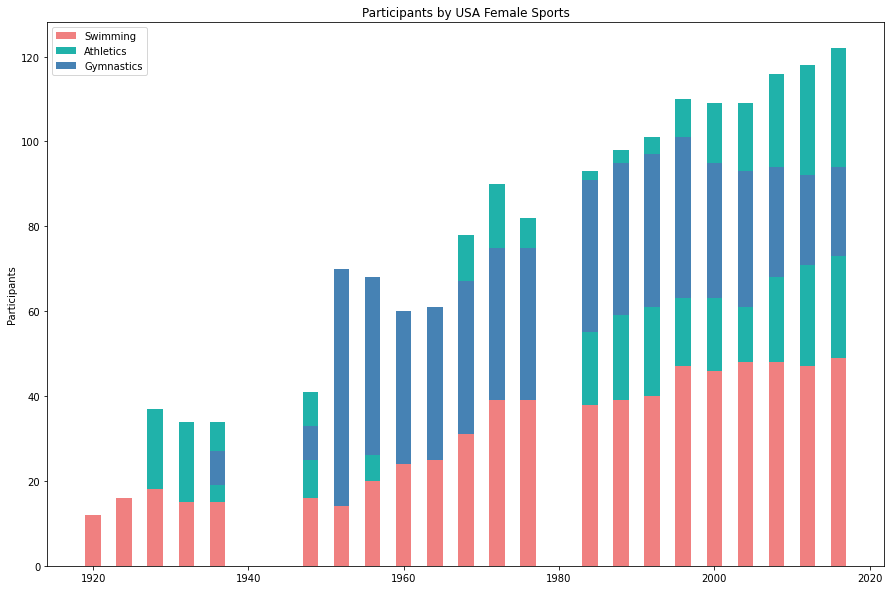

In [19]:
# labels_1 = df_yr1.index
# labels_2 = df_yr2.index

women_count_1 = df_yr1['ID']
women_count_2 = df_yr2['ID']
women_count_3 = df_yr3['ID']

merged_data = pd.merge(left = women_count_1, right = women_count_2, how='outer', on='Year')
merged_data = merged_data.fillna(0)
merged_data = merged_data.astype(int)

merged_data2 = pd.merge(women_count_3, merged_data, how='left', on='Year').fillna(0).astype(int)
# merged_data2
width = 2.00       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))
# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(merged_data2.index, merged_data2['ID'], width,
       label='Swimming', color= 'lightcoral')
ax.bar(merged_data2.index, merged_data2['ID_x'], width, bottom= merged_data2['ID'],
       label='Athletics', color = 'lightseagreen')
ax.bar(merged_data2.index, merged_data2['ID_y'], width, bottom= merged_data2['ID_x'],
       label='Gymnastics', color = 'steelblue')



ax.set_ylabel('Participants')
ax.set_title('Participants by USA Female Sports')
ax.legend()

plt.show()

In [20]:
men_athl_df = pd.DataFrame(df_yr4['ID'])
men_athl_df.columns = ['Athletics']
men_gym_df = pd.DataFrame(df_yr5['ID'])
men_gym_df.columns = ['Gymnastics']
men_swm_df = pd.DataFrame(df_yr6['ID'])
men_swm_df.columns = ['Swimming']

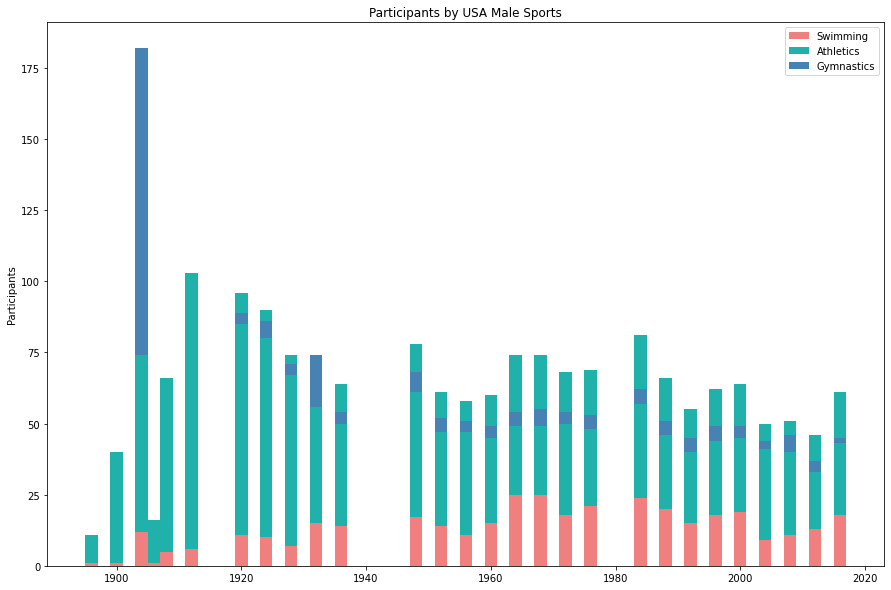

In [21]:
merged_men = pd.merge(men_athl_df, men_gym_df, on="Year", how="outer")
merged_men = pd.merge(merged_men, men_swm_df, on="Year", how="outer")
merged_men.fillna(0, inplace = True)
merged_men = merged_men.astype(int)
merged_men


width = 2.00       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))
# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(merged_men.index, merged_men['Swimming'], width,
       label='Swimming', color= 'lightcoral')
ax.bar(merged_men.index, merged_men['Athletics'], width, bottom= merged_men['Swimming'],
       label='Athletics', color = 'lightseagreen')
ax.bar(merged_men.index, merged_men['Gymnastics'], width, bottom= merged_men['Athletics'],
       label='Gymnastics', color ='steelblue')



ax.set_ylabel('Participants')
ax.set_title('Participants by USA Male Sports')
ax.legend()

plt.show()

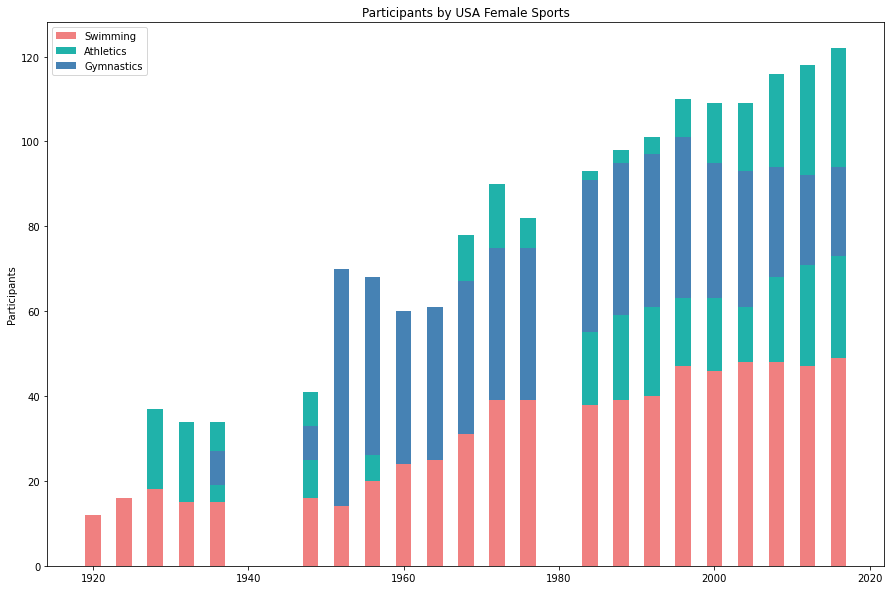

In [22]:
women_athl_df = pd.DataFrame(df_yr1['ID'])
women_athl_df.columns = ['Athletics']
women_gym_df = pd.DataFrame(df_yr2['ID'])
women_gym_df.columns = ['Gymnastics']
women_swm_df = pd.DataFrame(df_yr3['ID'])
women_swm_df.columns = ['Swimming']

merged_women = pd.merge(women_athl_df, women_gym_df, on="Year", how="outer")
merged_women = pd.merge(merged_women, women_swm_df, on="Year", how="outer")
merged_women.fillna(0, inplace = True)
merged_women = merged_women.astype(int)
merged_women


width = 2.00       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(merged_women.index, merged_women['Swimming'], width,
       label='Swimming', color= 'lightcoral')
ax.bar(merged_women.index, merged_women['Athletics'], width, bottom= merged_women['Swimming'],
       label='Athletics', color = 'lightseagreen')
ax.bar(merged_women.index, merged_women['Gymnastics'], width, bottom= merged_women['Athletics'],
       label='Gymnastics', color ='steelblue')



ax.set_ylabel('Participants')
ax.set_title('Participants by USA Female Sports')
ax.legend()

plt.show()